In [4]:
!pip install statsmodels --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 49.5 MB/s eta 0:00:00
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [9]:
df=pd.read_csv('/content/Electric_Production.csv',index_col=0,parse_dates=True)

In [10]:
df.head()

,IPG2211A2N
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


In [11]:
df.shape

(397, 1)

In [12]:
df.isnull().sum()

IPG2211A2N    0
dtype: int64

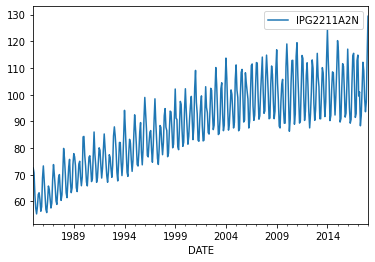

In [13]:
df.plot()

## ADF test for stationary or non stationary

In [14]:
from statsmodels.tsa.stattools import adfuller

In [15]:
adfTest=adfuller(df['IPG2211A2N'],autolag='AIC')

In [16]:
print('ADF=',adfTest[0])
print("pvalue=",adfTest[1])
print("no of Lags",adfTest[2])
print(" ADF regression calculate critical value=",adfTest[3])

for key,val in adfTest[4].items():
  print("key=",key,"val=",val)

ADF= -2.2569903500472366
pvalue= 0.18621469116587053
no of Lags 15
 ADF regression calculate critical value= 381
key= 1% val= -3.4476305904172904
key= 5% val= -2.869155980820355
key= 10% val= -2.570827146203181


-  pvalue is < 0.5 so data is stationary

In [17]:
rolling_mean = df.rolling(7).mean()
rolling_std = df.rolling(7).std()

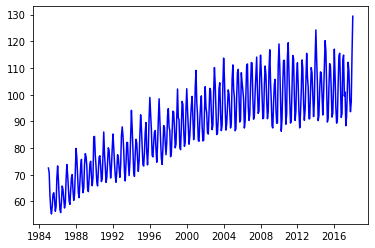

In [18]:
plt.plot(df, color="blue",label="Original Passenger Data")


## plot rolling mean

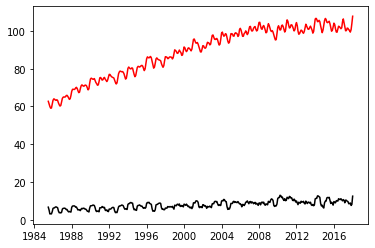

In [24]:
plt.plot(rolling_mean, color="red", label="Rolling Mean electric consumption")
plt.plot(rolling_std, color="black", label = "Rolling Standard deviation")

## auto corelation

In [25]:
autocorrelation_lag1 = df['IPG2211A2N'].autocorr(lag=1)
print("One Month Lag: ", autocorrelation_lag1)

One Month Lag:  0.8717308657532121


In [26]:
autocorrelation_lag3 = df['IPG2211A2N'].autocorr(lag=3)
print("Three Month Lag: ", autocorrelation_lag3)

autocorrelation_lag6 = df['IPG2211A2N'].autocorr(lag=6)
print("Six Month Lag: ", autocorrelation_lag6)

autocorrelation_lag9 = df['IPG2211A2N'].autocorr(lag=9)
print("Nine Month Lag: ", autocorrelation_lag9)

Three Month Lag:  0.5355867575850725
Six Month Lag:  0.9266842332406335
Nine Month Lag:  0.5180088174990667


## Decomposition

In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose

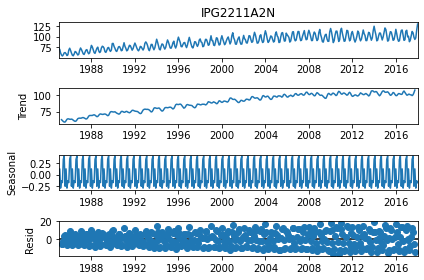

In [29]:
decompose = seasonal_decompose(df['IPG2211A2N'],model='additive', period=7)
decompose.plot()
plt.show()

## PACF and ACF

In [30]:
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf

/usr/local/lib/python3.8/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


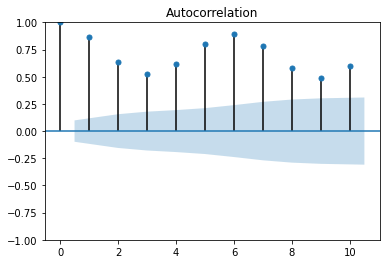

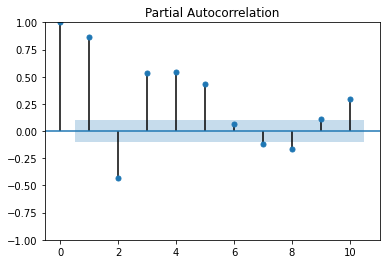

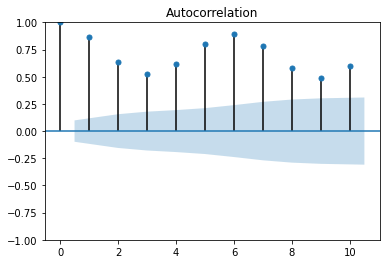

In [31]:
plot_pacf(df["IPG2211A2N"],lags=10)
plot_acf(df["IPG2211A2N"],lags=10)

In [ ]:
## Model test

In [37]:
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
series =df
# create lagged dataset
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
# split into train and test sets
X = dataframe.values
train, test = X[1:len(X)-7], X[len(X)-7:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]
 
# persistence model
def model_persistence(x):
 return x
 
# walk-forward validation
predictions = list()
for x in test_X:
 yhat = model_persistence(x)
 predictions.append(yhat)
test_score = mean_squared_error(test_y, predictions)
print('Test MSE: %.3f' % test_score)
# plot predictions vs expected

Test MSE: 110.506


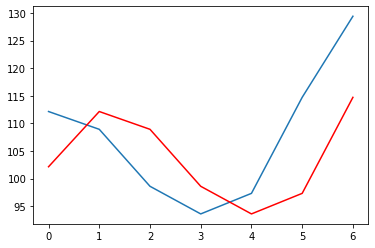

In [38]:
pyplot.plot(test_y)
pyplot.plot(predictions, color='red')
pyplot.show()

## for 7 days prediction

Coefficients: [ 2.93952871  0.89817897 -0.39851643 -0.03602724  0.03729834  0.38894923
  0.07999351]
predicted=106.465180, expected=112.153800
predicted=105.090438, expected=108.931200
predicted=97.102922, expected=98.615400
predicted=91.131871, expected=93.613700
predicted=93.378256, expected=97.335900
predicted=100.494859, expected=114.721200
predicted=105.719045, expected=129.404800
Test RMSE: 10.919


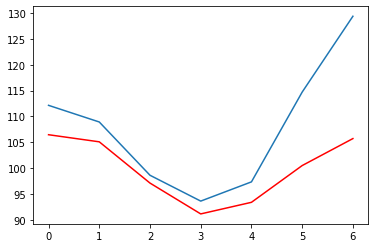

In [42]:
from statsmodels.tsa.ar_model import AutoReg
from math import sqrt
# load dataset
series = df
# split dataset
X = series.values
train, test = X[1:len(X)-7], X[len(X)-7:]
# train autoregression
model = AutoReg(train, lags=6)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)
# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
 print('predicted=%f, expected=%f' % (predictions[i], test[i]))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot results
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()